In [236]:
# TODO building neural network

import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

In [237]:
import torch.nn as nn
import torch.nn.functional as F

In [238]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
# Initialize model
net = Net()

# Initialize optimizer
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])


print(net)

Model's state_dict:
fc1.weight 	 torch.Size([64, 784])
fc1.bias 	 torch.Size([64])
fc2.weight 	 torch.Size([64, 64])
fc2.bias 	 torch.Size([64])
fc3.weight 	 torch.Size([64, 64])
fc3.bias 	 torch.Size([64])
fc4.weight 	 torch.Size([10, 64])
fc4.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'params': [0, 1, 2, 3, 4, 5, 6, 7]}]
Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [239]:


EPOCHS = 10

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.1540, grad_fn=<NllLossBackward0>)
tensor(0.2752, grad_fn=<NllLossBackward0>)
tensor(0.0816, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.0144, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(1.1002e-05, grad_fn=<NllLossBackward0>)


In [240]:
# check how good is network
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.991


In [241]:
# save model to disk
import time
PATH = f"MNIST_trained_model-{EPOCHS}_epochs-{int(time.time())}"
torch.save(net.state_dict(), PATH)

In [242]:
net = Net()
MODEL_NAME = "MNIST_trained_model-10_epochs-1718478650"
net.load_state_dict(torch.load(MODEL_NAME))
net.eval()

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

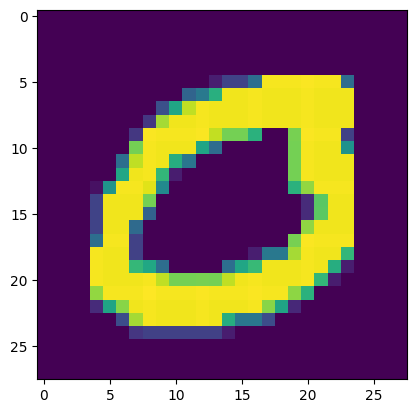

In [243]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()
           

In [244]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(0)


In [245]:

# recognize custom made digits
import os
import cv2
import numpy as np

image_number = 0
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        # Load and prepare the image
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        
        # Resizing to prevent misshaped digits
        img = cv2.resize(img, (28, 28))

        # Perform thresholding to binarize the image
        #_, img = cv2.threshold(img, thresh=128, maxval=255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        img = np.invert(img)
        # Convert the prepared image to a PyTorch Tensor
        input_tensor = torch.from_numpy(img).float() # convert the data type to float
        input_tensor = input_tensor.reshape(-1, 28 * 28)/ 255.0 # faltten tensor into 1D

        #print(input_tensor[0])
        # Feed the input Tensor to the network and display the prediction
        output = net(input_tensor)
        print(f"Output tensor: {output}")
        pred_probs = output.detach().numpy()
        pred_class = np.argmax(pred_probs)
        print(f"Predicted probability distribution: {pred_probs}")
        print(f"{image_number}: Predicted class index: {pred_class}\n")

    except Exception as e:
        print(e)

    image_number += 1
        

Output tensor: tensor([[ -0.1920, -12.0579,  -2.2811,  -2.7866,  -5.6787, -12.7267, -15.4410,
          -7.4496,  -6.6471,  -5.1897]], grad_fn=<LogSoftmaxBackward0>)
Predicted probability distribution: [[ -0.1919879 -12.057859   -2.2811012  -2.786586   -5.6786537 -12.726727
  -15.441033   -7.449615   -6.6471076  -5.189708 ]]
0: Predicted class index: 0

Output tensor: tensor([[-22.4134,  -0.8600,  -0.5572, -12.5345,  -9.6482, -19.0154, -16.7349,
          -5.5337, -14.3450, -17.0296]], grad_fn=<LogSoftmaxBackward0>)
Predicted probability distribution: [[-22.413433    -0.86003834  -0.55715954 -12.534548    -9.648236
  -19.015423   -16.734943    -5.533681   -14.345042   -17.029644  ]]
1: Predicted class index: 2

Output tensor: tensor([[-43.0574, -24.5327,   0.0000, -21.4490, -30.9988, -49.5364, -50.5423,
         -26.9539, -37.9228, -50.7244]], grad_fn=<LogSoftmaxBackward0>)
Predicted probability distribution: [[-43.057426 -24.532717   0.       -21.449028 -30.998838 -49.536354
  -50.542

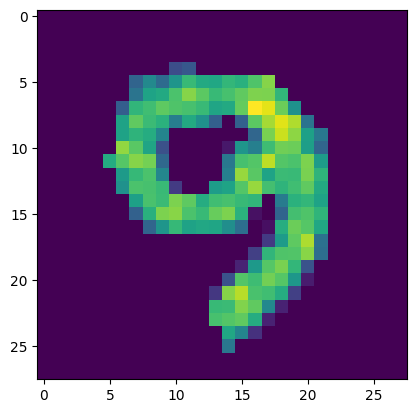

In [222]:
plt.imshow(input_tensor[0].view(28,28))
plt.show()

In [223]:
print(input_tensor[0])

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [180]:
print(X[0])

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,